In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os

In [2]:
# read the index 
index = pd.read_excel('Cleaned Data/index.xlsx')

In [129]:
shape = gpd.read_file('../../02_Data/01_GIS/02_Full file/NUTS_COVID.shp')[['NUTS_ID', 'geometry']]

In [51]:
# read the files 

files = [file for file in os.listdir('Cleaned data/') if not file.startswith('index')]

out = []

for file in files:
    read = pd.read_excel('Cleaned data/' + file)
    out.append(read)

In [52]:
from functools import reduce 

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['GEO/TIME'],
                                            how='outer'), out)

C:\Users\MHACHA~1\AppData\Local\Temp/ipykernel_10484/976554216.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'2020_x', '2019_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['GEO/TIME'],


In [53]:
index = pd.read_excel('Cleaned data/index.xlsx')

In [54]:
ds = pd.merge(index, df_merged, left_on = "NAME", right_on = "GEO/TIME")

In [58]:
ds.columns = ['NUTS_ID', 'NAME', 'GEO/TIME', '2019_one', '2020_one', '2019_two', '2020_two',
       '2019_three', '2020_three', '2019_four', '2020_four']

In [69]:
for i in ds.filter(like = '2019').columns: 
    ds[i].replace(':', 0, inplace = True)
    
for i in ds.filter(like = '2020').columns: 
    ds[i].replace(':', 0, inplace = True)

In [86]:
ds.sample(10)

,NUTS_ID,GEO/TIME,2019_one,2020_one,2019_two,2020_two,2019_three,2020_three,2019_four,2020_four
762,FRM0,Corse,189.8,192.1,127.6,129.5,8.7,11.7,6.4,0.0
1765,TR4,Dogu Marmara,5452.9,5483.1,2780.2,2729.4,399.6,342.6,360.5,312.7
1494,FI20,Åland,17.4,18.1,14.2,14.7,0.0,0.0,0.0,0.0
1160,HU21,Közép-Dunántúl,694.4,692.3,498.4,496.0,10.2,14.4,35.6,30.7
817,RO21,Nord-Est,2052.0,2030.5,5058.2,4953.7,302.8,304.5,152.3,148.3
1383,PT11,Norte,2374.5,2372.9,1638.1,1628.2,122.4,125.4,116.9,107.3
1578,UKE,Yorkshire and The Humber,3410.2,0.0,2480.7,0.0,119.6,0.0,317.5,0.0
473,EL63,Dytiki Ellada,421.3,418.2,209.4,211.6,68.2,59.7,7.1,7.0
1574,UKD3,Greater Manchester,1817.6,0.0,1325.6,0.0,72.8,0.0,154.2,0.0
791,ITC4,Lombardia,6395.1,6412.6,4372.3,4288.6,267.0,233.2,230.2,207.0


## Make the analysis 

In [87]:
ds.drop_duplicates(keep = 'first', inplace = True)

In [88]:
ds.shape

(494, 10)

In [89]:
ds.drop('NAME', axis = 1, inplace = True)

KeyError: "['NAME'] not found in axis"

In [146]:
from sklearn.decomposition import PCA


In [147]:
one = np.array(ds.filter(like = '2019'))
two = ds.filter(like = '2020')

In [148]:
pca = PCA(n_components = 1)
one_out =  pd.DataFrame(pca.fit_transform(np.array(one)), index = ds.NUTS_ID)
two_out =  pd.DataFrame(pca.fit_transform(np.array(two)), index = ds.NUTS_ID)

In [149]:
one_out.columns = ['2019']
two_out.columns = ['2020']

## Make the maps 

In [150]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [152]:
ds = pd.concat([one_out, two_out], axis =1)

In [157]:
s = gpd.GeoDataFrame(pd.merge(ds, shape, left_on = ds.index, right_on = 'NUTS_ID'))

<AxesSubplot:>

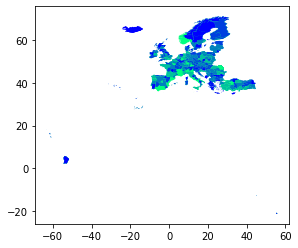

array([[<AxesSubplot:title={'center':'2020'}>]], dtype=object)

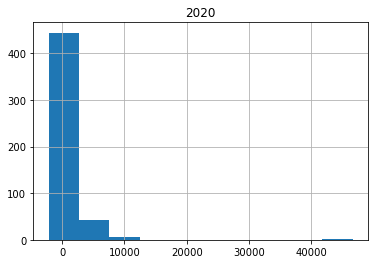

In [138]:
# plot the maps 

fig, ax = plt.subplots(1,2, figsize = (19, 18), constrained_layout = True)
world.plot(ax = ax[0], color = 'grey', alpha = .1)
# geo_d_rate.plot(column = 'D_first_wave', ax = ax[0], cmap='magma_r', scheme='quantiles', k = 6, legend = True)
ax[0].set_title('(a) Ecological index of COVID-19 social impacts \n Before the pandemic (2019)', loc = 'center', color = '#054ea2', fontweight = 'bold')

################################# second map 

world.plot(ax = ax[1], color = 'grey', alpha = .1)
# geo_d_rate.plot(column = 'D_second_wave', ax = ax[1], cmap='magma_r', scheme='quantiles', k = 6, legend = True)
ax[1].set_title('(a) Ecological index of COVID-19 social impacts \n Before the pandemic (2020)', loc ='center', color = '#054ea2', fontweight = 'bold')


################################# wrap up & clean 

for i in range(2): 
    ax[i].set_xlim(2.4e6, 6.6e6)
    ax[i].set_ylim(0.13e7, 0.545e7)
    ax[i].axis('off')
    major_cities.plot(marker = 'h', ax = ax[i], facecolor = 'w', zorder = 1, edgecolor = '#44FFD2')
    minor_cities.plot(marker = 'h', ax = ax[i], facecolor = 'w', zorder = 1, edgecolor = '#F564A9')
    ax[i].text(x = 3.4e6, y = 1.4e6, s = u"\u00A9 ESPON EGTC, 2021", fontsize = 6)
    world[~(world['iso_a3'].isin(["IRL", "GBR", "ISL","SWE", "ITA"]))].boundary.plot(color = 'w', linewidth = 1.4 , zorder  =1, ax =ax[i])
    scalebar = ScaleBar(0.66, width_fraction=None, location= "lower right", box_alpha = 0, length_fraction = 0.08, height_fraction  = 0.003) # 1 pixel = 0.2 meter
    ax[i].add_artist(scalebar)
    # legend 
    # leg = ax[i].get_legend()
    # leg.get_frame().set_color('w')
plt.show()